<a href="https://colab.research.google.com/github/IcarusFe1l/ArkadasimHG/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dfRet =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
dfRet.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [16]:
#We start with basic statistics for both numeric and categorical data
def unistats(dataframe,sorted="Missing"):
    """"
    Takes dataframe and sorted as parameter
    Returns count, missing, unique, dtype, mode and other stats"""
    pd.set_option("display.max_rows",100)
    pd.set_option("display.max_columns",100)
    output_df = pd.DataFrame(columns = ["Count","Missing","Unique", "Dtype", "Mode", "Mean", "Min", "25%", "Median", "75%", "Max", "Std", "Skew", "Kurt"])

    for col in dataframe:
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            output_df.loc[col] =[dataframe[col].count() ,dataframe[col].isnull().sum() ,dataframe[col].nunique() ,dataframe[col].dtype ,dataframe[col].mode().values[0], dataframe[col].mean(), dataframe[col].min(), dataframe[col].quantile(0.25), dataframe[col].median(), dataframe[col].quantile(0.75),dataframe[col].max(), dataframe[col].std(), dataframe[col].skew(),dataframe[col].kurt()]
        else:
            output_df.loc[col] =[dataframe[col].count() ,dataframe[col].isnull().sum() ,dataframe[col].nunique() ,dataframe[col].dtype , "-", "-", "-","-", "-", "-","-", "-", "-","-"]


    return output_df.sort_values(by = ["Dtype",sorted])

In [65]:
# One hot encode the categorical columns
numeric_features = ["Purchase","Purchase_Std"]
categorical_features = ["Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status"]
one_hot_df = pd.get_dummies(users_df[categorical_features], columns = categorical_features, dtype = int, drop_first = True)
one_hot_df = pd.concat([users_df[numeric_features], one_hot_df], axis = 1)

In [11]:
user= pd.DataFrame(columns=["User_ID", "Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", "Total_Purchase"])
users_df = dfRet.groupby("User_ID").agg({"Gender":"first", "Age":"first", "Occupation":"first", "City_Category":"first", "Stay_In_Current_City_Years":"first", "Marital_Status":"first", "Purchase":"sum"})
users_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
User_ID,,,,,,,
1000001,F,0-17,10,A,2,0,334093
1000002,M,55+,16,C,4+,0,810472
1000003,M,26-35,15,A,3,0,341635
1000004,M,46-50,7,B,2,1,206468
1000005,M,26-35,20,A,1,1,821001


In [14]:
users_df["Average_Purchase_Amount"] = dfRet.groupby("User_ID").agg({"Purchase":"mean"})
#find standart deviation of purchase
users_df["Purchase_Std"] = dfRet.groupby("User_ID").agg({"Purchase":"std"})
users_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,Average_Purchase_Amount,Purchase_Std
User_ID,,,,,,,,,
1000001,F,0-17,10,A,2,0,334093,9545.514286,4639.871552
1000002,M,55+,16,C,4+,0,810472,10525.610390,4301.736734
1000003,M,26-35,15,A,3,0,341635,11780.517241,5358.428805
1000004,M,46-50,7,B,2,1,206468,14747.714286,5801.640132
1000005,M,26-35,20,A,1,1,821001,7745.292453,4110.717354


In [17]:
unistats(users_df)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Occupation,5891,0,21,int64,4,8.153285,0,3.0,7.0,14.0,20,6.32314,0.33749,-1.212475
Marital_Status,5891,0,2,int64,0,0.419963,0,0.0,0.0,1.0,1,0.493594,0.324414,-1.895399
Purchase,5891,0,5876,int64,116586,865016.59175,46681,237678.0,521213.0,1119249.5,10536909,943644.539683,2.427964,8.538912
Average_Purchase_Amount,5891,0,5886,float64,7992.153846,9568.839914,2318.733333,8287.212366,9386.208333,10654.633199,18577.893617,1890.087105,0.54966,0.88902
Purchase_Std,5891,0,5891,float64,1132.589189,4863.435596,1132.589189,4344.978267,4878.187074,5401.849356,8986.127721,864.661376,-0.095722,0.7413
Gender,5891,0,2,object,-,-,-,-,-,-,-,-,-,-
Age,5891,0,7,object,-,-,-,-,-,-,-,-,-,-
City_Category,5891,0,3,object,-,-,-,-,-,-,-,-,-,-
Stay_In_Current_City_Years,5891,0,5,object,-,-,-,-,-,-,-,-,-,-


In [21]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import scale

X = users_df.drop("Purchase", axis = 1)

# Select only numeric columns for scaling
numeric_cols = X.select_dtypes(include=['number']).columns
X[numeric_cols] = scale(X[numeric_cols])

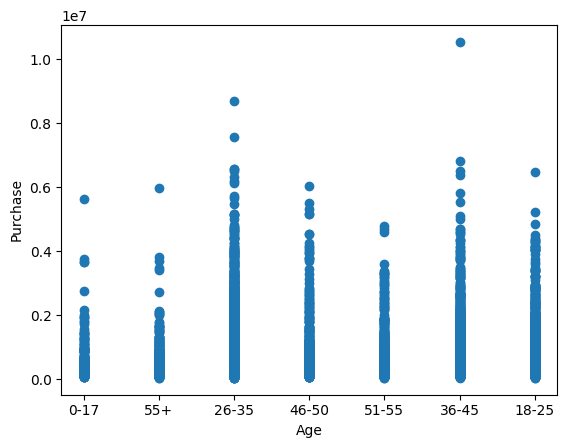

In [23]:
# Visualize scatterplot
plt.scatter(users_df["Age"], users_df["Purchase"]) # Use the original 'users_df' DataFrame which still has the 'Purchase' column
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


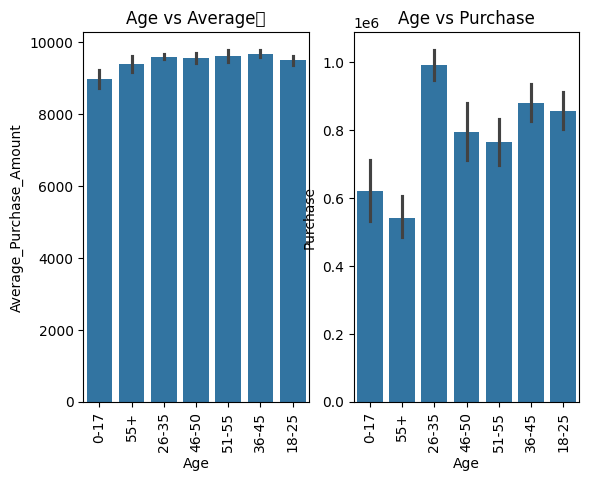

In [45]:
plt.subplot(1,2,1)
plt.title("Age vs Average	")
plt.figsize=(10,6)
plt.xticks(rotation = 90)
sns.barplot(data = users_df, x = "Age", y = "Average_Purchase_Amount")
plt.subplot(1,2,2)
plt.figsize=(10,6)
plt.xticks(rotation = 90)
plt.title("Age vs Purchase")
sns.barplot(data = users_df, x = "Age", y = "Purchase");

<Axes: title={'center': 'Gender vs Purchase'}, xlabel='Gender', ylabel='Purchase'>

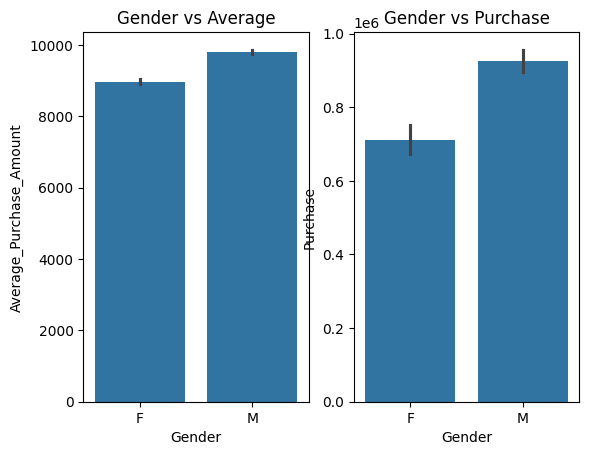

In [46]:
#Lets look at who purchase more
plt.subplot(1,2,1)
plt.title("Gender vs Average")
plt.figsize=(10,6)
sns.barplot(data = users_df, x = "Gender", y = "Average_Purchase_Amount")
plt.subplot(1,2,2)
plt.figsize=(10,6)
plt.title("Gender vs Purchase")
sns.barplot(data = users_df, x = "Gender", y = "Purchase")

Through these pilots we can analyze the correlation between age and average order quantities as well as role of gender on the average order quantities as well.

<Axes: xlabel='Average_Purchase_Amount', ylabel='Purchase_Std'>

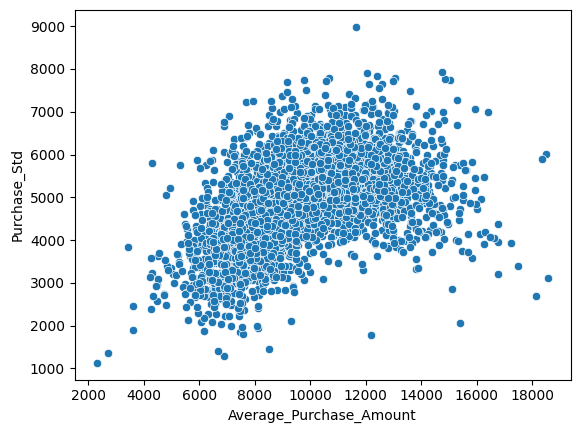

In [48]:
sns.scatterplot(data = users_df, x = "Average_Purchase_Amount", y = "Purchase_Std")

In [54]:
from sklearn.cluster import KMeans


cluster = KMeans(n_clusters = 3, n_init=10)
cluster.fit(users_df[["Purchase_Std","Average_Purchase_Amount"]])


KMeans(n_clusters=3, n_init=10)

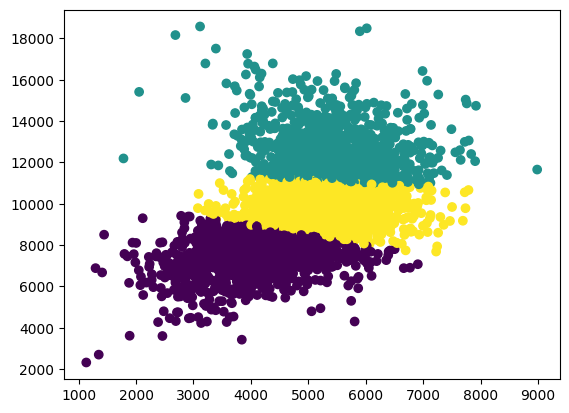

In [57]:
plt.scatter(users_df["Purchase_Std"], users_df["Average_Purchase_Amount"], c = cluster.labels_)

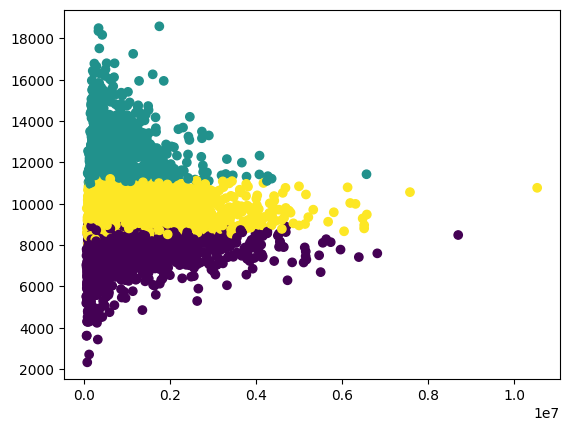

In [60]:
plt.scatter(users_df["Purchase"], users_df["Average_Purchase_Amount"], c = cluster.labels_)

In [61]:

#Lets calculate silhoutte score
from sklearn.metrics import silhouette_score


silhouette_score(users_df[["Purchase_Std","Average_Purchase_Amount"]], cluster.labels_)

0.4173030333264284

In [62]:
for i in range(2,5):
    cluster = KMeans(n_clusters = i,n_init = 10)
    cluster.fit(users_df[["Purchase_Std","Average_Purchase_Amount"]])
    print(f'Silhouette score for {i} clusters: {silhouette_score(users_df[["Purchase_Std","Average_Purchase_Amount"]], cluster.labels_)}')


Silhouette score for 2 clusters: 0.4648705775796357
Silhouette score for 3 clusters: 0.4169822946610283
Silhouette score for 4 clusters: 0.38472602257078803


According to result:

In [66]:
all = KMeans(n_clusters=2, n_init=10)
all.fit(one_hot_df)

KMeans(n_clusters=2, n_init=10)

In [67]:
silhouette_score(one_hot_df, all.labels_)

0.7241164130165237

In [68]:
for i in range(2,5):
    cluster = KMeans(n_clusters = i,n_init=10)
    cluster.fit(one_hot_df)
    print(f'Silhouette score for {i} clusters: {silhouette_score(one_hot_df, cluster.labels_)}')

Silhouette score for 2 clusters: 0.7241164130165237
Silhouette score for 3 clusters: 0.6725049297730207
Silhouette score for 4 clusters: 0.6328135005480008


In [69]:
one_hot_df.head()

,Purchase,Purchase_Std,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_1
User_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,334093,4639.871552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1000002,810472,4301.736734,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1000003,341635,5358.428805,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1000004,206468,5801.640132,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1000005,821001,4110.717354,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


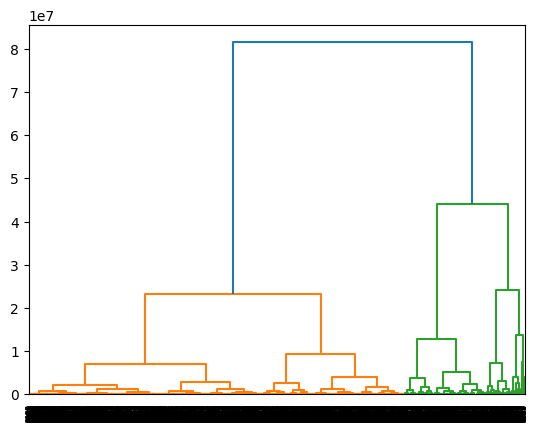

In [77]:
from scipy.cluster import hierarchy


model = hierarchy.linkage(users_df[numeric_features], method = "ward")


hierarchy.dendrogram(model)
plt.show()


In [78]:
silhouette_score(users_df[numeric_features], hierarchy.fcluster(model, 2, criterion = "maxclust"))

0.6872371631268478

Slightly worse then Kmeans

In [81]:
# Build DBScan model
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps = 0.5, min_samples = 5)
dbscan.fit(users_df[numeric_features])
users_df['cluster_label'] = dbscan.labels_
users_df.head()


,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,Average_Purchase_Amount,Purchase_Std,cluster_label
User_ID,,,,,,,,,
1000001,F,0-17,A,2,0,334093,9545.514286,4639.871552,-1
1000002,M,55+,C,4+,0,810472,10525.610390,4301.736734,-1
1000003,M,26-35,A,3,0,341635,11780.517241,5358.428805,-1
1000004,M,46-50,B,2,1,206468,14747.714286,5801.640132,-1
1000005,M,26-35,A,1,1,821001,7745.292453,4110.717354,-1


In [89]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

# Adjust eps and min_samples to find suitable clustering
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]  # Experiment with different values
min_samples = 5  # Fix min_samples for this example

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(users_df[numeric_features])
    labels = dbscan.labels_

    # Count clusters excluding noise
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # Count noise points
    n_noise = list(labels).count(-1)

    if n_clusters >= 2:
        silhouette_avg = silhouette_score(users_df[numeric_features], labels)
        print(f"eps: {eps:.1f} \t Clusters: {n_clusters} \t Noise: {n_noise} \t Silhouette Score: {silhouette_avg}")
    else:
        print(f"eps: {eps:.1f} resulted in a single cluster or all noise.")

# Check if any eps value resulted in valid clusters
valid_clustering_found = any(len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0) >= 2 for eps in eps_values)

if valid_clustering_found:
    # If valid clustering was found, calculate silhouette score using the labels from the best eps (you need to determine which eps is best based on the previous output)
    # For example, assuming eps=0.3 gave the best results:
    best_eps = 0.3
    dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
    dbscan.fit(users_df[numeric_features])
    best_labels = dbscan.labels_
    silhouette_avg = silhouette_score(users_df[numeric_features], best_labels)
    print(f"Final Silhouette Score (using eps={best_eps}): {silhouette_avg}")
else:
    print("No valid clustering found for the given eps values. Consider adjusting eps_values or min_samples.")

# Define the cluster_dbscan function if it's not already defined
def cluster_dbscan(X, eps, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    if n_clusters >= 2:
        silhouette_avg = silhouette_score(X, labels)
    else:
        silhouette_avg = None  # Or any value indicating invalid clustering
    return n_clusters, n_noise, silhouette_avg

for eps in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    dbscan_clusters, dbscan_anomalies, dbscan_sil_score = cluster_dbscan(users_df[numeric_features], eps)
    print('eps: ',eps,'\t', 'Clusters: ', dbscan_clusters, '\t', 'Noise: ', dbscan_anomalies, '\t', 'Silhouette Score: ', dbscan_sil_score)

eps: 0.1 resulted in a single cluster or all noise.
eps: 0.2 resulted in a single cluster or all noise.
eps: 0.3 resulted in a single cluster or all noise.
eps: 0.4 resulted in a single cluster or all noise.
eps: 0.5 resulted in a single cluster or all noise.
No valid clustering found for the given eps values. Consider adjusting eps_values or min_samples.
eps:  0.1 	 Clusters:  0 	 Noise:  5891 	 Silhouette Score:  None
eps:  0.2 	 Clusters:  0 	 Noise:  5891 	 Silhouette Score:  None
eps:  0.3 	 Clusters:  0 	 Noise:  5891 	 Silhouette Score:  None
eps:  0.4 	 Clusters:  0 	 Noise:  5891 	 Silhouette Score:  None
eps:  0.5 	 Clusters:  0 	 Noise:  5891 	 Silhouette Score:  None
eps:  0.6 	 Clusters:  0 	 Noise:  5891 	 Silhouette Score:  None
eps:  0.7 	 Clusters:  0 	 Noise:  5891 	 Silhouette Score:  None


I couldn't find the silhouette scores to make comperasion between, unfortunately :S